In [1]:
import pandas as pd

birddata = pd.read_csv("bird_tracking.csv")

In [2]:
import matplotlib.pyplot as plt

import numpy as np

ix = birddata.bird_name == 'Eric'

x, y = birddata.longitude[ix], birddata.latitude[ix]

plt.figure(figsize=(7, 7))
plt.plot(x, y, ".")

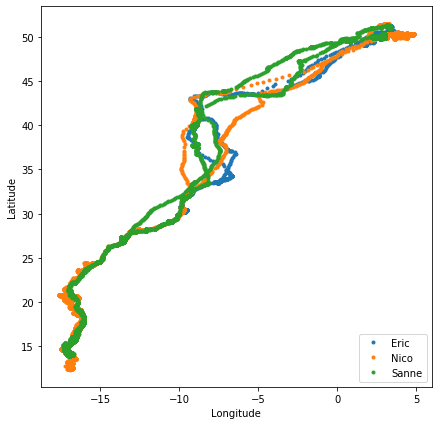

In [3]:
bird_names = pd.unique(birddata.bird_name)

plt.figure(figsize=(7, 7))

for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x, y, ".", label=bird_name)
    
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

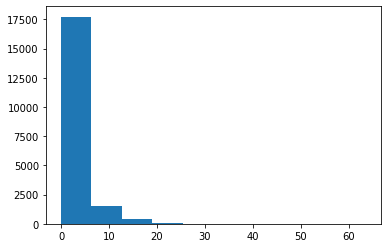

In [4]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind]);
plt.savefig("hist.pdf")

C:\Users\iremu\Anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


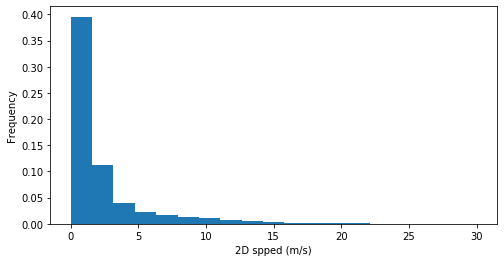

In [5]:
plt.figure(figsize=(8, 4))
speed = birddata.speed_2d[birddata.bird_name == 'Eric']
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), normed=True);
plt.xlabel("2D spped (m/s)")
plt.ylabel("Frequency");

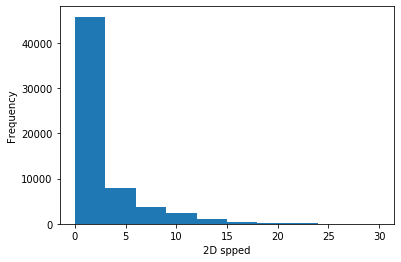

In [6]:
birddata.speed_2d.plot(kind='hist', range=[0, 30])
plt.xlabel("2D spped")
plt.savefig("pd_hist.pdf")

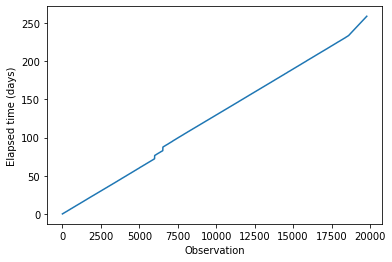

In [7]:
import datetime

timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
    (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
    
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed_time = [time - times[0] for time in times]

plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");
plt.savefig("timeplot.pdf")

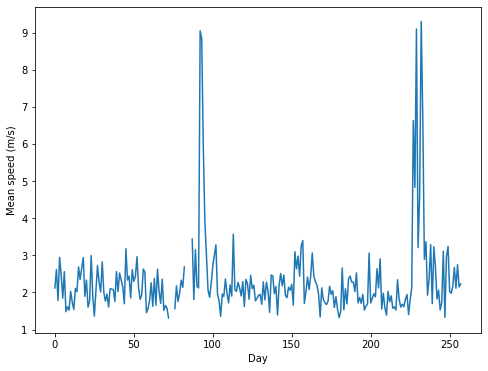

In [8]:
data = birddata[birddata.bird_name == 'Eric']
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day+=1
        inds = []
        
plt.figure(figsize=(8, 6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)");
plt.savefig("dms.pdf")

In [9]:
timestamps = birddata[birddata.bird_name == 'Sanne'].timestamp.array

timestamps = sorted(timestamps)

timestamps[0]

Timestamp('2013-08-15 00:01:08')

C:\Users\iremu\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\iremu\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\iremu\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\iremu\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


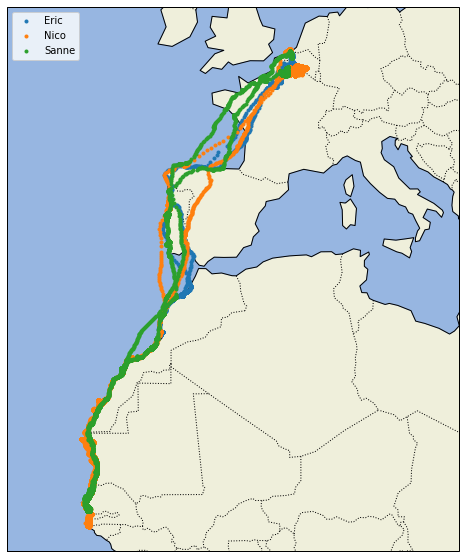

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, ".", transform=ccrs.Geodetic(), label=bird_name)
    
plt.legend(loc="upper left")
plt.savefig("map.pdf")